## Well log data loading, visualization, scale

First step is to import a LAS (Log Ascii Standard)

Then do a quick check of the imported data, renaming header of well-log curve parameter,
adjusting presence of outlier either discarding them or fill in with mean value.

To identify outlier - do the below steps
1. Idenify interpretation zone and choose data from that interval
2. Generate histogram of each individual well-log curves (GR, RES, RHOB, DT, NPHI)
3. Create pair-plot of group of logs, atleast three log curves
4. Generate triple combo plot

In [2]:
# import libraires are crucial part to analyse, visualize data with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# install lasio package
!pip install lasio

SyntaxError: invalid syntax (<ipython-input-2-65f679b88d13>, line 2)

In [4]:
import lasio

In [5]:
# read the log file; it could be las/csv/txt file
#details about lasio module https://lasio.readthedocs.io/en/latest/
las = lasio.read('C:/Users/utkar/Downloads/Well-1.las')

In [6]:
# curve mnemonic, unit, data shape
las.curves

[CurveItem(mnemonic="DEPTH:1", unit="M", value="", descr="Depth", original_mnemonic="DEPTH", data.shape=(486,)),
 CurveItem(mnemonic="BS_BPC", unit="in", value="", descr="BitSize", original_mnemonic="BS_BPC", data.shape=(486,)),
 CurveItem(mnemonic="CGR_BPC", unit="API", value="", descr="GammaRay", original_mnemonic="CGR_BPC", data.shape=(486,)),
 CurveItem(mnemonic="DEPTH:2", unit="M", value="", descr="Depth", original_mnemonic="DEPTH", data.shape=(486,)),
 CurveItem(mnemonic="GR_BPC", unit="API", value="", descr="GammaRay", original_mnemonic="GR_BPC", data.shape=(486,)),
 CurveItem(mnemonic="HCAL_BPC", unit="in", value="", descr="Caliper", original_mnemonic="HCAL_BPC", data.shape=(486,)),
 CurveItem(mnemonic="HDRA_BPC", unit="gm/cc", value="", descr="Drho", original_mnemonic="HDRA_BPC", data.shape=(486,)),
 CurveItem(mnemonic="NPOR_BPC", unit="v/v", value="", descr="Neutron", original_mnemonic="NPOR_BPC", data.shape=(486,)),
 CurveItem(mnemonic="PEFZ_BPC", unit="B/E", value="", descr

In [7]:
# quick look of data
las.data

array([[1812.036 ,       nan,   84.2774, ...,       nan,       nan,
              nan],
       [1812.1884,       nan,   83.1745, ...,       nan,       nan,
              nan],
       [1812.3408,       nan,   83.2417, ...,       nan,       nan,
              nan],
       ...,
       [1885.6452,       nan,       nan, ...,       nan,       nan,
              nan],
       [1885.7976,       nan,       nan, ...,       nan,       nan,
              nan],
       [1885.95  ,       nan,       nan, ...,       nan,       nan,
              nan]])

In [8]:
# convert to a pandas dataframe as it makes exploratory data analysis easier
data1 = las.df()

In [9]:
# display few rows of data
print(data1)

           BS_BPC  CGR_BPC    DEPTH:2   GR_BPC  HCAL_BPC  HDRA_BPC  NPOR_BPC  \
DEPTH:1                                                                        
1812.0360     NaN  84.2774  1812.0359      NaN       NaN       NaN       NaN   
1812.1884     NaN  83.1745  1812.1884      NaN       NaN       NaN       NaN   
1812.3408     NaN  83.2417  1812.3407      NaN       NaN       NaN       NaN   
1812.4932     NaN  85.4597  1812.4932      NaN       NaN       NaN       NaN   
1812.6456     NaN  84.9037  1812.6455      NaN       NaN       NaN       NaN   
...           ...      ...        ...      ...       ...       ...       ...   
1885.3404     8.5  40.0565  1885.3403  46.7450    8.2401   -0.0068    0.2332   
1885.4928     8.5  41.0374  1885.4928  49.7817    8.2631   -0.0060    0.2456   
1885.6452     NaN      NaN  1885.6451      NaN       NaN       NaN       NaN   
1885.7976     NaN      NaN  1885.7975      NaN       NaN       NaN       NaN   
1885.9500     NaN      NaN  1885.9500   

In [10]:
#description of column
data1.columns

Index(['BS_BPC', 'CGR_BPC', 'DEPTH:2', 'GR_BPC', 'HCAL_BPC', 'HDRA_BPC',
       'NPOR_BPC', 'PEFZ_BPC', 'RHOZ_BPC', 'RLA3_BPC', 'RLA5_BPC', 'RXOZ_BPC'],
      dtype='object')

# **We need to reset index to make depth as column**

In [11]:
data2= data1.reset_index()

In [12]:
# recheck following reset of index about data column and you can observe 'DEPTH:1' is inside the columns
data2.columns

Index(['DEPTH:1', 'BS_BPC', 'CGR_BPC', 'DEPTH:2', 'GR_BPC', 'HCAL_BPC',
       'HDRA_BPC', 'NPOR_BPC', 'PEFZ_BPC', 'RHOZ_BPC', 'RLA3_BPC', 'RLA5_BPC',
       'RXOZ_BPC'],
      dtype='object')

In [13]:
# rename any of the header definination -  standard header name is helpful for interpretation.
data2 = data2.rename(columns=({'DEPTH:1': 'DEPTH', 'GR_BPC': 'GR', 'HCAL_BPC':'CAL','DEPTH:2': 'DEPTH_2',
                               'NPOR_BPC':'NPHI','BS_BPC':'BS','RHOZ_BPC':'RHOB' ,'RLA5_BPC':'RESD',
                               'RXOZ_BPC':'RXO','PEFZ_BPC':'PE', 'HDRA_BPC':'DRA', 'RLA3_BPC':'RESM' }))

In [14]:
#recheck column name after rename of the header
data2.columns

Index(['DEPTH', 'BS', 'CGR_BPC', 'DEPTH_2', 'GR', 'CAL', 'DRA', 'NPHI', 'PE',
       'RHOB', 'RESM', 'RESD', 'RXO'],
      dtype='object')

In [15]:
#statistics of the dataframe, here dataframe name is - data2
data2.describe()

,DEPTH,BS,CGR_BPC,DEPTH_2,GR,CAL,DRA,NPHI,PE,RHOB,RESM,RESD,RXO
count,486.000000,477.0,483.000000,486.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,1848.993000,8.5,52.583066,1848.992941,72.683199,8.491513,-0.006305,0.183384,2.880191,2.322808,13.138179,18.321788,1.822301
std,21.403114,0.0,19.567984,21.403114,37.790521,0.278359,0.042595,0.066264,0.494678,0.227567,20.534797,30.648859,2.023406
min,1812.036000,8.5,21.197400,1812.035900,35.961000,8.045000,-0.071000,0.045000,2.192000,1.958000,0.286300,0.312100,0.147000
25%,1830.514500,8.5,40.150250,1830.514425,44.835000,8.428000,-0.028000,0.125000,2.576000,2.166000,0.700000,0.967000,0.573000
50%,1848.993000,8.5,43.684100,1848.992900,50.985000,8.482000,-0.015000,0.188000,2.787000,2.271000,4.090000,4.039300,1.138000
75%,1867.471500,8.5,71.087200,1867.471425,106.389100,8.512000,0.002500,0.238100,3.116400,2.591000,13.465000,17.459000,2.354200
max,1885.950000,8.5,99.403000,1885.950000,165.523600,10.814000,0.303000,0.388000,5.850000,2.745100,173.927000,246.289000,13.472000


Histogram plot of different log curves

Text(0, 0.5, 'Frequency')

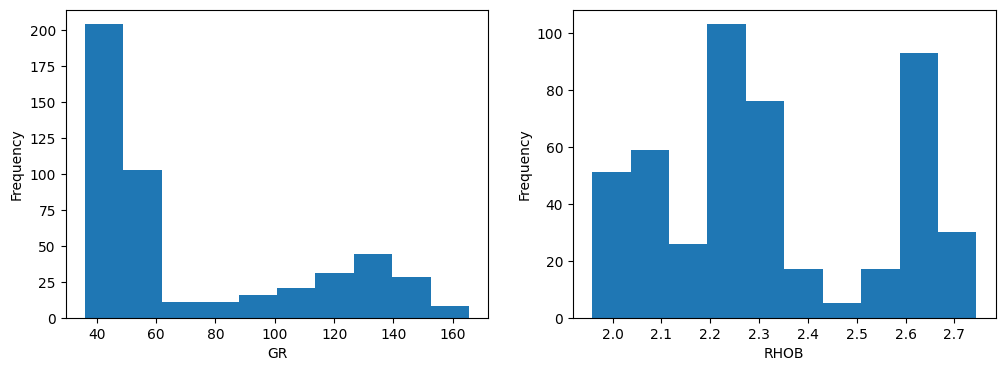

In [16]:
#script to plot histogram of GR and RHOB log (default type of plot)
#Also drop any nan value during histogram plot
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(data2.GR.dropna())
plt.xlabel('GR')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(data2.RHOB.dropna())
plt.xlabel('RHOB')
plt.ylabel('Frequency')

<Axes: ylabel='Frequency'>

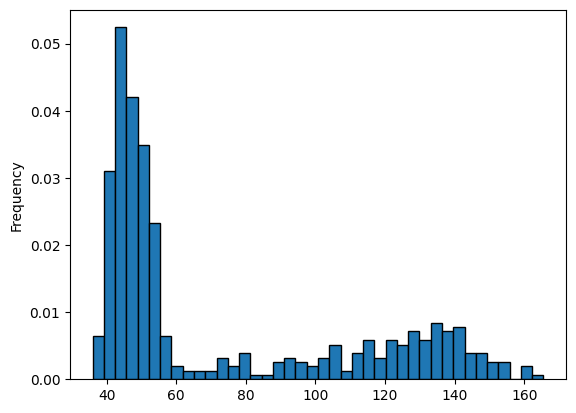

In [17]:
# histogram plot with user modified bin size, colour, etc
data2['GR'].plot(kind='hist', bins=40, density=True, edgecolor='black')

Mean value, p5 and p95 values are: 72.68319874213837 40.6392 142.81026


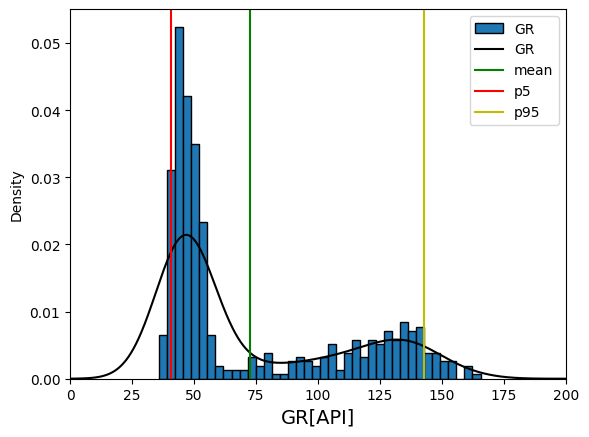

In [18]:
# Another way to display histogram with percentile, mean, and probability distribution function
# Kernel density estimation (KDE) is a non-parametric method for
# estimating the probability density function of a given random variable
data2['GR'].plot(kind='hist', bins=40, density=True,edgecolor='black')
data2['GR'].plot(kind='kde',color='black')
plt.xlabel('GR[API]', fontsize=14)
mean=data2['GR'].mean()
p05=data2.GR.quantile(0.05)
p95=data2.GR.quantile(0.95)
plt.axvline(mean,color='g',label='mean')
plt.axvline(p05,color='r',label='p5')
plt.axvline(p95,color='y',label='p95')
plt.legend()
plt.xlim(0,200)
print('Mean value, p5 and p95 values are:', mean, p05,p95)

Explanation of Pandas DataFrame
Pandas DataFrame is a 2-D labeled data structure with columns of potentially different type.
![image.png](attachment:image.png)

Text(0.5, 0, 'RHOB [g/cm3]')

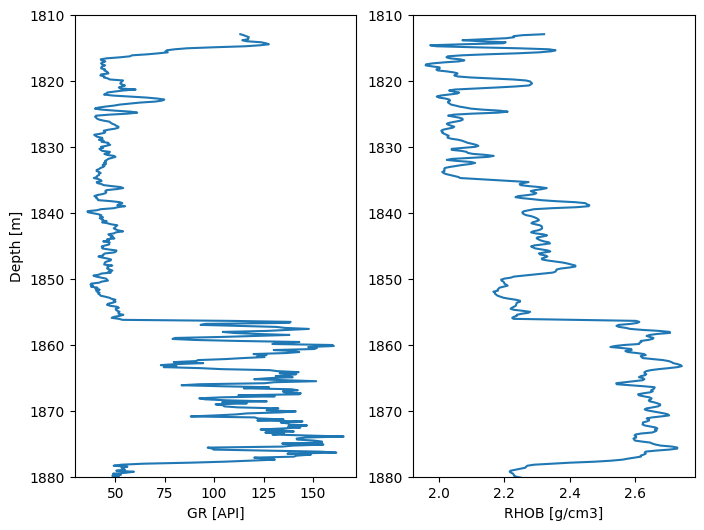

In [19]:
#Example of simple 1-D plot of GR and RHOB log curves.
# Always plot increasing depth in the downward direction.
plt.figure(1,figsize=(8,6))
plt.subplot(121)
plt.plot(data2.GR, data2['DEPTH'])
plt.ylim(1880,1810)
plt.xlabel('GR [API]')
plt.ylabel('Depth [m]')

plt.subplot(122)
plt.plot(data2.RHOB, data2['DEPTH'])
plt.ylim(1880,1810)
plt.xlabel('RHOB [g/cm3]')

(1880.0, 1850.0)

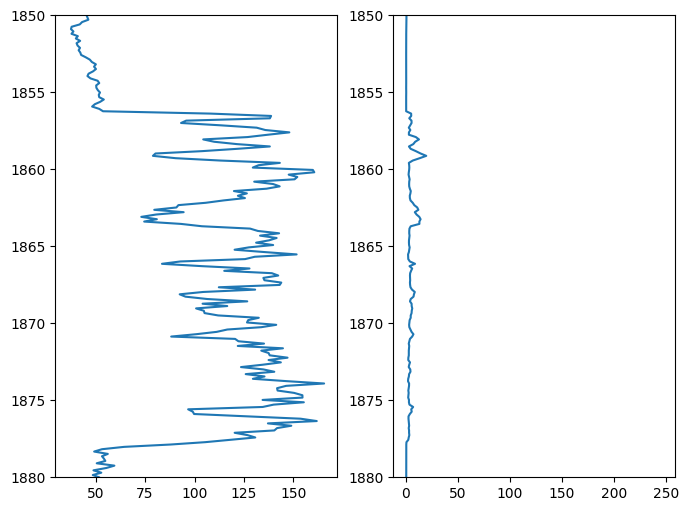

In [22]:
# In the previous plot, we are displaying 70m data in small visualization window.
# To notice obvious changes of log data,
plt.figure(1,figsize=(8,6))
plt.subplot(121)
plt.plot(data2.GR, data2['DEPTH'])
plt.ylim(1880,1850)

plt.subplot(122)
plt.plot(data2.RESD, data2['DEPTH'])

plt.ylim(1880,1850)

In [23]:
data=lasio.read('C:/Users/utkar/Downloads/Well-1.las')

In [25]:
# Histogram plot of GR, SP, NPHI, RHOB
logs = data.copy()
plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.hist(logs.GR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('GR[API]')
plt.ylabel('Frequency')
#plt.xlim(0,150)
#plt.grid(True)

plt.subplot(222)
plt.hist(logs.RXO8.dropna(), bins=15, color='b', edgecolor='k')
plt.xlabel('Resistivity[ohm-m]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(223)
plt.hist(logs.NPHI.dropna(), bins=15, color='c', edgecolor='k')
plt.xlabel('NPHI[frac]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(224)
plt.hist(logs.RHOB.dropna(), bins=15, color='r', edgecolor='k')
plt.xlabel('RHOB[g/cc]')
plt.ylabel('Frequency')
#plt.grid(True)

#plt.subplots_adjust(top=1.2, bottom=.1, left=0.10, right=0.9, hspace=0.25, wspace=0.35)
#plt.savefig('histogram_v2.png', dpi =250, format = 'png')

AttributeError: 'LASFile' object has no attribute 'copy'

In [ ]:
data.describe()

,Depth,C1,C2,DTCO,DTS,GR,NPHI,RHOB,RLA1,RLA4,RXO8,SGRC
count,51798.00000,51798.000000,51798.000000,51798.000000,50850.000000,51798.000000,51798.000000,51798.000000,51798.000000,51798.000000,51798.000000,51798.000000
mean,2868.85570,8.815780,8.660700,101.407745,204.407189,84.079696,0.295201,2.347891,245.539113,-9.213309,2.017164,87.577004
std,379.80465,0.419015,0.414744,14.524313,51.889224,39.636127,0.073091,0.142091,4379.595365,134.748985,7.967531,59.079567
min,2211.03380,4.176300,4.251200,50.093800,80.889700,28.393000,0.005100,1.299800,0.001400,-999.250000,0.030000,-999.250000
25%,2539.94475,8.564400,8.384100,89.981200,165.489150,53.641800,0.244900,2.267600,0.973825,1.036900,0.768825,53.346450
50%,2868.85570,8.912400,8.780000,98.543800,186.692350,70.374350,0.292050,2.343600,1.260250,1.348800,1.254300,72.670350
75%,3197.76665,9.041100,8.854300,114.048500,246.305750,111.324300,0.345800,2.432100,2.068800,2.221375,1.818975,120.067925
max,3526.67760,13.225700,12.781300,141.073900,374.961000,284.339200,0.666400,3.608800,100000.000000,3168.231300,361.151200,450.354800


In [ ]:
# drop unnecessary columns not required for further analysis
col_rm = ['BitSize', 'MudWgt']
data.drop(col_rm, axis=1, inplace=True)

In [ ]:
# recheck the columns if the follwoing columns are dropped or not
data.columns

Index(['M__DEPTH', 'SP', 'GR', 'CALI', 'LL8', 'ILM', 'ILD', 'RHOB', 'NPHI',
       'DT'],
      dtype='object')

In [ ]:
# rename any of the header definination
data = data.rename(columns=({'M__DEPTH': 'DEPTH'}))

# Basic statistical check of the file like mean, std, min, max


In [ ]:
# adding extra additional 5 percentile and 95 percentiles
data.describe(percentiles=[0.05, .25,.5,.75,.95])

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT
count,7131.000000,7131.000000,7131.000000,7131.000000,7131.000000,7131.000000,7131.000000,7131.000000,7131.000000,7131.000000
mean,1883.500000,-13.468958,85.803303,6.046503,-517.729741,13.494343,13.833211,-2.203987,32.747727,96.839962
std,1029.343359,53.702492,54.073909,68.569633,507.795726,80.544716,43.599721,67.971405,43.137760,79.290686
min,101.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
5%,279.250000,-34.887575,58.092450,8.326750,-999.000000,4.421050,5.291950,2.216700,19.677650,69.226250
25%,992.250000,-14.657295,80.309250,8.680150,-999.000000,7.406300,8.228500,2.385900,30.064250,87.950150
50%,1883.500000,-7.179590,88.790700,8.987600,-999.000000,9.590300,11.564700,2.444400,34.672200,102.995400
75%,2774.750000,-2.308335,97.476100,12.938750,15.325300,13.014200,15.913000,2.492100,38.576650,115.548750
95%,3487.750000,-0.229120,110.893900,13.664500,27.426150,36.840750,40.828850,2.575950,48.323250,134.442540
max,3666.000000,13.516080,226.662200,15.961800,111.520400,2361.596190,976.620970,2.817900,59.030300,163.841400


In [ ]:
# replacing non recording values as nan
ip_log = data.replace(-999.00000, np.nan)

In [ ]:
# statistic to check drop of the non recording values
ip_log.describe()

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT
count,7131.000000,7111.000000,7115.000000,7098.000000,3375.000000,7121.000000,7121.000000,7098.000000,7119.000000,7096.000000
mean,1883.500000,-10.697109,88.242776,10.719162,17.870583,14.916186,15.255530,2.430314,34.486872,102.245035
std,1029.343359,12.339286,16.670073,2.217874,10.466519,71.096631,21.466444,0.106472,8.146626,19.101787
min,101.000000,-95.259540,30.818100,8.181800,3.437500,2.454400,1.752300,1.918300,-0.074800,55.451000
25%,992.250000,-14.606185,80.409350,8.683150,12.901000,7.416500,8.234600,2.386925,30.093900,88.149900
50%,1883.500000,-7.140850,88.816600,8.990400,15.688400,9.597600,11.571700,2.444900,34.686400,103.132700
75%,2774.750000,-2.298495,97.505050,12.940950,19.923350,13.018100,15.917700,2.492200,38.584650,115.663550
max,3666.000000,13.516080,226.662200,15.961800,111.520400,2361.596190,976.620970,2.817900,59.030300,163.841400


We will check how many values are nan in this data frame using for loop

In [ ]:
for m in ip_log.columns:
    print(m, ip_log[m].isnull().values.any())
print(ip_log.isnull().sum())

DEPTH False
SP True
GR True
CALI True
LL8 True
ILM True
ILD True
RHOB True
NPHI True
DT True
DEPTH       0
SP         20
GR         16
CALI       33
LL8      3756
ILM        10
ILD        10
RHOB       33
NPHI       12
DT         35
dtype: int64


In [ ]:
# assigning index location
ip_log = ip_log.iloc[:,:]

In [ ]:
# Again looking first five line of the dataframe
ip_log.head(5)

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT
0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0724,NaN
1,101.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0736,NaN
2,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0748,NaN
3,102.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5165,NaN
4,103.0,NaN,34.3222,NaN,NaN,NaN,NaN,NaN,36.2902,NaN


In [ ]:
# replace nan values by mean value of the log measurment
ip_log['RHOB'].fillna(ip_log['RHOB'].mean(),inplace=True)
ip_log['SP'].fillna(ip_log['SP'].mean(), inplace=True)
ip_log['DT'].fillna(ip_log['DT'].mean(), inplace=True)
ip_log['GR'].fillna(ip_log['GR'].mean(), inplace=True)
ip_log['CALI'].fillna(ip_log['CALI'].mean(), inplace=True)
#ip_log['LL8'].fillna(ip_log['LL8'].mean(), inplace=True)
ip_log['ILM'].fillna(ip_log['ILM'].mean(), inplace=True)
ip_log['ILD'].fillna(ip_log['ILD'].mean(), inplace=True)
ip_log['NPHI'].fillna(ip_log['NPHI'].mean(), inplace=True)

Checking of any outlier through dispalying Pair-plot

In [ ]:
# recheck if all values are replace with mean
for m in ip_log.columns:
    print(m, ip_log[m].isnull().values.any())
print(ip_log.isnull().sum())

DEPTH False
SP False
GR False
CALI False
LL8 True
ILM False
ILD False
RHOB False
NPHI False
DT False
DEPTH       0
SP          0
GR          0
CALI        0
LL8      3756
ILM         0
ILD         0
RHOB        0
NPHI        0
DT          0
dtype: int64


In [ ]:
# Now all nan value should be replace by mean value; this a choice we need to made
ip_log.head(5)

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT
0,101.0,-10.697109,88.242776,10.719162,NaN,14.916186,15.25553,2.430314,-0.0724,102.245035
1,101.5,-10.697109,88.242776,10.719162,NaN,14.916186,15.25553,2.430314,-0.0736,102.245035
2,102.0,-10.697109,88.242776,10.719162,NaN,14.916186,15.25553,2.430314,-0.0748,102.245035
3,102.5,-10.697109,88.242776,10.719162,NaN,14.916186,15.25553,2.430314,13.5165,102.245035
4,103.0,-10.697109,34.322200,10.719162,NaN,14.916186,15.25553,2.430314,36.2902,102.245035


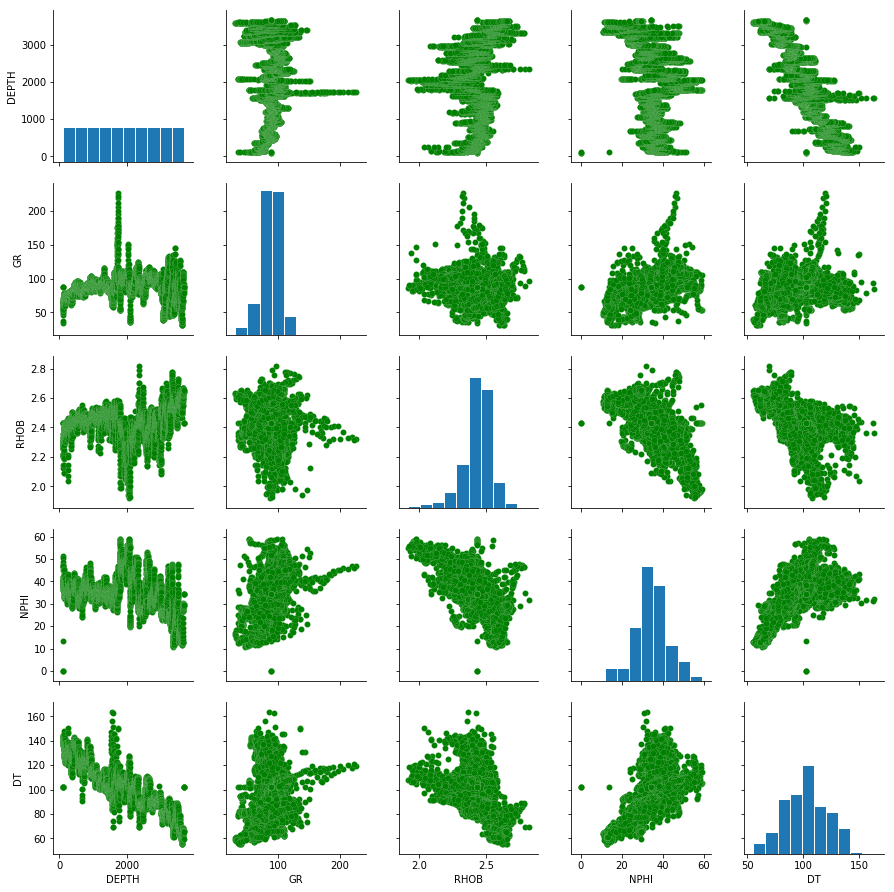

In [ ]:
# pair plot between each log and its histogram

grid = sns.PairGrid(ip_log, vars=['DEPTH','GR','RHOB', 'NPHI','DT'] )
grid.map_diag(plt.hist, edgecolor='w')
grid.map_offdiag(plt.scatter, color='g', edgecolor='W', linewidth=0.1)
plt.savefig('WA1_pairgrid_four_plot.png', dpi=250)

Add formation tops to display on the log plot

In [ ]:
tops = ('Torok','Pebble SH','Walakpa SS', 'J-Klingak','Barrow SS','Klingak SH','T-Sag River SS', 'Shublik','Basement')
tops_depths=(100,1701,2071,2087,2990, 3102,3224,3258,3633)

# 2. Display the Log (Mainly triple combo log)

In [ ]:
# call the triple combo function as defined
def triple_combo_log(top_depth,bottom_depth):

    logs=ip_log[(ip_log.DEPTH >= top_depth) & (ip_log.DEPTH <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharey=True)
    fig.suptitle("Triple-combo Log display", fontsize=24)
    fig.subplots_adjust(top=0.75,wspace=0.1)

# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',
                          verticalalignment='center')
#First track GR, CALI, SP logs to display
        ax1 = ax[0].twiny()
        ax1.set_xlim(-100,0)
        ax1.spines['top'].set_position(('outward',0))
        ax1.plot(logs.SP, logs.DEPTH, '-b', label= "SP (mV)")
        ax1.set_xlabel('SP(mV)',color='b')
        ax1.tick_params(axis='x', colors='b')
        ax1.grid(True)

        ax2 = ax[0].twiny()
        ax2.set_xlim(0, 16)
        ax2.spines['top'].set_position(('outward', 40))
        ax2.plot(logs.CALI, logs.DEPTH, '--k', label= "CALI (in)")
        ax2.set_xlabel('CALI(in)', color ='k')
        ax2.tick_params(axis='x', colors='k')

        ax3 = ax[0].twiny()
        ax3.set_xlim(0,150)
        ax3.spines['top'].set_position(('outward', 80))
        ax3.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
        ax3.set_xlabel('GR(API)', color= 'g')
        ax3.tick_params(axis='x', colors='g')


# Second track resitivity plot
        ax11 = ax[1].twiny()
        ax11.set_xlim(0.1, 1000)
        ax11.set_xscale('log')
        ax11.grid(True)
        ax11.spines['top'].set_position(('outward', 80))
        ax11.plot(logs.ILD, logs.DEPTH, '-r', label="ILD (m.ohm)")
        ax11.set_xlabel('ILD(m.ohm)', color = 'r')
        ax11.tick_params(axis='x', colors='r')


        ax12 = ax[1].twiny()
        ax12.set_xlim(0.1, 1000)
        ax12.set_xscale('log')
        ax12.spines['top'].set_position(('outward', 40))
        ax12.plot(logs.ILM, logs.DEPTH, '-m', label= "ILM (m.ohm)")
        ax12.set_xlabel('ILM(m.ohm)', color= 'm')
        ax12.tick_params(axis='x', colors='m')

        ax13 = ax[1].twiny()
        ax13.set_xlim(0.1, 1000)
        ax13.set_xscale('log')
        ax13.spines['top'].set_position(('outward', 0))
        ax13.plot(logs.LL8, logs.DEPTH, '-k', label="LL8 (m.ohm)")
        ax13.set_xlabel('RESS(m.ohm)', color = 'k')
        ax13.tick_params(axis='x', colors='k')

# Third track NPHI, RHO, DT display
        ax21 = ax[2].twiny()
        ax21.grid(True)
        ax21.set_xlim(140,40)
        ax21.spines['top'].set_position(('outward', 0))
        ax21.plot(logs.DT, logs.DEPTH, '-b', label= "DT (us/ft)")
        ax21.set_xlabel('DT(us/ft)', color= 'b')
        ax21.tick_params(axis='x', colors= 'b')


        ax22 = ax[2].twiny()
        ax22.set_xlim(0, 60)
        ax22.invert_xaxis()
        ax22.spines['top'].set_position(('outward', 40))
        ax22.plot(logs.NPHI, logs.DEPTH, '--k', label = "NPHI (%)")
        ax22.set_xlabel('NPHI(%)', color = 'k')
        ax22.tick_params(axis= 'x', colors='k')

        ax23 = ax[2].twiny()
        ax23.set_xlim(1.95, 2.95)
        ax23.spines['top'].set_position(('outward', 80))
        ax23.plot(logs.RHOB, logs.DEPTH, '-r', label= "RHOB (g/cc)")
        ax23.set_xlabel('RHOB(g/cc)', color = 'r')
        ax23.tick_params(axis='x', colors= 'r')

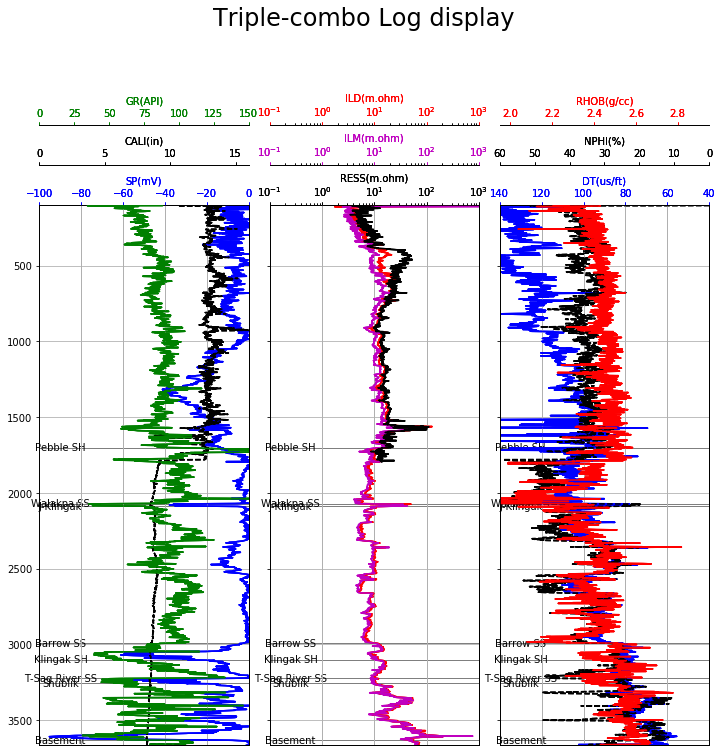

In [ ]:
# Lets display the whole log at a glance
triple_combo_log(ip_log.DEPTH.min(), ip_log.DEPTH.max())
plt.savefig('Triple_combo_WA1_full_plot.png', dpi=250)

# Select particular zone of interest

Choose top_depth and bottom depth

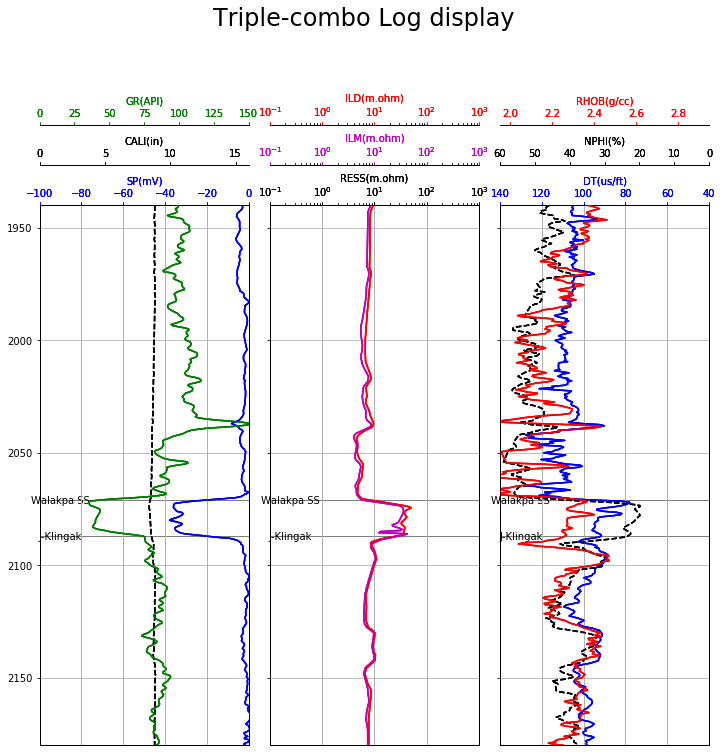

In [ ]:
top_depth = 1940
bottom_depth=2180
triple_combo_log(top_depth, bottom_depth)
plt.savefig('Triple_combo_WA1_1940-2180m.png', dpi=250)

# 3. Volumetric compuation of clay/Then convert to shale

various method available to compute clay volume present within a formation lithology:
Either single log or  dual log methods.
Single log: GR log, Spontanteous potential, Resistivity
Dual method: Neutron-density, it is a cross-plot methods where we need to identify clay line and clean line

In [ ]:
# Vcl as a function of gamma ray index/clay index

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
GRI = np.arange(0,1.10,.1) # clay index from 0 to 1 with step of .1

def vclGR(i):
    return i
def vclGR_claiver(i):
    return 1.7 - ((3.38 - (i + 0.7)**2))**.5
def vclGR_steiber(i):
    return i /(3 - 2*i)
def vclGR_larionov_younger(i):
    return 0.083 * (2**(3.7* i) -1)
def vclGR_larionov_older(i):
    return 0.33 *(2**(2*i) -1)

#vclGR = Icl # linear
#vclGR_claiver = 1.7 - ((3.38 - (Icl + 0.7)**2))**.5
#vclGR_steiber = Icl /(3 - 2*Icl)
#vclGR_larionov_younger = 0.083 * (2**(3.7* Icl) -1)
#vclGR_larionov_older = 0.33 *(2**(2*Icl) -1)


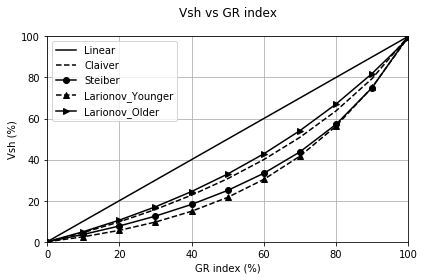

In [ ]:

# Icl vs vclGR plot
fig, ax = plt.subplots()
ax.plot(GRI*100, vclGR(GRI) *100, 'k', label= 'Linear')
ax.plot(GRI*100, vclGR_claiver(GRI)*100,  '--k', label = 'Claiver')
ax.plot(GRI*100, vclGR_steiber(GRI)*100, '-ok', label='Steiber')
ax.plot(GRI*100, vclGR_larionov_younger(GRI)*100, '--^k', label='Larionov_Younger')
ax.plot(GRI*100, vclGR_larionov_older(GRI)*100, '->k', label='Larionov_Older')
ax.grid(True)
ax.set_xlabel('GR index (%)', color= 'k')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_ylabel('Vsh (%)', color = 'k')
ax.tick_params(axis='x', colors= 'k')
#ax.xaxis.set_label_position('top')
#ax.xaxis.set_ticks_position('top')
ax.set_title('Vsh vs GR index', pad =20)
ax.legend()
plt.tight_layout()
plt.savefig('Clay_index_to_Clay_volume_v2.png', dpi =250, format = 'png')


In [ ]:
# specific zone of interest for histogram creation
logs=ip_log[(ip_log.DEPTH >= top_depth) & (ip_log.DEPTH <= bottom_depth)]

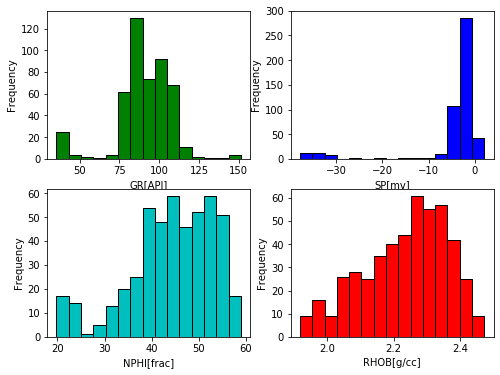

In [ ]:
# Histogram plot of GR, SP, NPHI, RHOB

plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.hist(logs.GR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('GR[API]')
plt.ylabel('Frequency')
#plt.xlim(0,150)
#plt.grid(True)

plt.subplot(222)
plt.hist(logs.SP.dropna(), bins=15, color='b', edgecolor='k')
plt.xlabel('SP[mv]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(223)
plt.hist(logs.NPHI.dropna(), bins=15, color='c', edgecolor='k')
plt.xlabel('NPHI[frac]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(224)
plt.hist(logs.RHOB.dropna(), bins=15, color='r', edgecolor='k')
plt.xlabel('RHOB[g/cc]')
plt.ylabel('Frequency')
#plt.grid(True)

#plt.subplots_adjust(top=1.2, bottom=.1, left=0.10, right=0.9, hspace=0.25, wspace=0.35)
plt.savefig('histogram_v2.png', dpi =250, format = 'png')

In [26]:
# N-D cross-plot generation; where color represent variation of GR value
plt.figure(figsize=(8,6))
plt.scatter(logs.NPHI, logs.RHOB, c = logs.GR, marker='o', s=100, edgecolors='w', cmap='jet', vmin=0, vmax=150)
plt.xlim(-5, 55); plt.ylim(3, 1.8); plt.xlabel('NPHI[%]'); plt.ylabel('RHOB[g/cc]'); plt.grid(True)
plt.colorbar(); plt.title('N-D Crossplot', pad=20);
plt.text(15, 2.4, 'clean line', fontsize=12)
plt.text(20, 2.6, 'Shale line', fontsize=12)
plt.text(40, 2.65, 'Wet clay point', fontsize=12)
plt.text(0, 2.8, 'Matrix/Silt\n point', fontsize=12)
plt.plot([0,50],[2.65,2.15], marker='o', color='black')
plt.plot([0,45],[2.65,2.4], marker='o', color='red')
plt.plot(45,2.4,'ro',color='black')
plt.tight_layout()

NameError: name 'logs' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
# define function to compute clay index (Icl) and there after clay volume from Gamma log (GR).
#Also required to identify GR_clean, GR_shale zone

def vclGR(GRlog, GRclean, GRcl, formation=None):
    Icl = (GRlog - GRclean)/(GRclay-GRclean) # clay index computation(Icl)
    vclGR_larionov_younger = 0.083 * (2**(3.7* Icl) -1)  # Larionov Equation for Teartiary rock
    vclGR_larionov_older = 0.33 *(2**(2*Icl) -1) # Larionov equation for older rocks
    vclGR_claiver = 1.7 - (3.38 - (Icl + 0.7)**2)**0.5 # Clavier equation
    vclGR_steiber = Icl /(3 - 2*Icl) # Steiber equation

    if (formation == "young" or formation == "tertiary"):
        vclGR =  vclGR_larionov_younger
    elif formation == "older":
        vclGR =  vclGR_larionov_older
    elif formation == "claiver":
        vclGR = vclGR_claiver
    elif formation == "steiber":
        vclGR = vclGR_steiber
    else:
        vclGR = Icl
    return vclGR

# computation of volume of clay from SP log: not efficient enough
def vclSP(SPlog, SPclean, SPclay):
    vclsp = (SPlog - SPclean)/(SPclay - SPclean)
    return vclsp

# computation of volume of clay from N-D cross plot
# we choose wet clay point to obatin neu-clay and rho_clay value
def vclND(neu_log, rho_log, rho_matrix,neu_clay, rho_clay, neu_matrix, neu_fluid, rho_fluid ):
    a1 = (rho_matrix - rho_fluid)*(neu_matrix - neu_log) - (rho_matrix - rho_log)*(neu_matrix - neu_fluid)
    b1 = (rho_matrix - rho_fluid)*(neu_matrix - neu_clay) - (rho_matrix - rho_clay)*(neu_matrix - neu_fluid)
    vclND = (a1/b1)
    return vclND

@ Define value of the parameters for computation of voulme of clay based on histogram and ND-crossplot as shown above.
Also have a look on the description of datasets


In [ ]:
logs.describe()

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT
count,481.000000,481.000000,481.000000,481.000000,0.0,481.000000,481.000000,481.000000,481.000000,481.000000
mean,2060.000000,-4.564994,90.506251,8.722164,NaN,8.455652,9.580657,2.234172,44.202585,103.015074
std,69.498501,7.967453,17.630836,0.111892,NaN,6.003901,7.370970,0.125847,9.048906,7.959670
min,1940.000000,-37.861110,35.400100,8.373300,NaN,4.073600,4.560500,1.918300,19.787200,78.008600
25%,2000.000000,-4.170700,82.861100,8.671600,NaN,6.120800,6.969800,2.145900,39.128800,97.068700
50%,2060.000000,-2.149530,90.316800,8.764900,NaN,7.161200,7.896500,2.258700,44.909200,103.956000
75%,2120.000000,-1.485490,102.673000,8.807400,NaN,7.802300,8.603200,2.332000,51.389800,108.211800
max,2180.000000,2.102590,151.350010,8.865900,NaN,42.466200,50.298600,2.472200,58.964300,127.775200


In [ ]:
# defining parameter for clay computation

GRclean, GRclay = 35, 150
SPclean, SPclay = -35, 1

rho_matrix = 2.65 # for sandstone
#neu_matrix =
neu_clay, rho_clay = 45, 2.4

# looping through logs value to compute Vcl from the above defined function

# define new_function to store the compute clay values

vclGR_temp, vclSP_temp, vclND_temp = [],[],[]


for (i,j,k,l) in zip(logs.GR, logs.NPHI, logs.RHOB, logs.SP):
    vclGR_temp.append(vclGR(i, GRclean, GRclay))
    vclSP_temp.append(vclSP(l, SPclean, SPclay))
    vclND_temp.append(vclND(j,k, rho_matrix,neu_clay, rho_clay, neu_matrix=0, neu_fluid=100, rho_fluid=1.1))
logs = logs.copy() # copy of the dataframe

logs['VCLGR']= vclGR_temp
logs['VCLSP']= vclSP_temp
logs['VCLND'] = vclND_temp
del vclGR_temp, vclSP_temp, vclND_temp

We will display all computed clay from from different method along with display of GR, SP log.
Also in the same diagram display the histogram

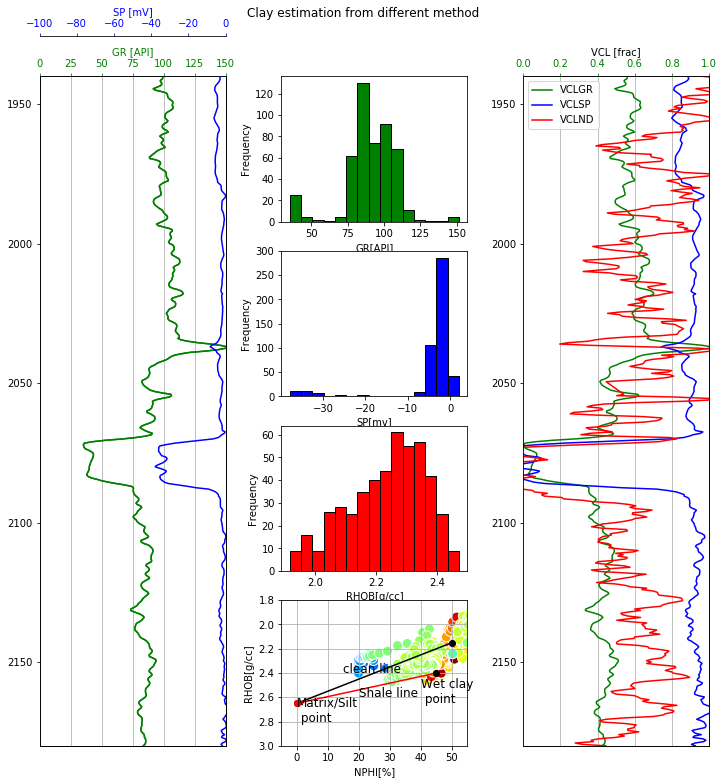

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,12))
fig.suptitle('Clay estimation from different method')
fig.subplots_adjust(top= 0.9, wspace= .3, hspace=.2)

gs = gridspec.GridSpec(4,3)

ax1 = fig.add_subplot(gs[:,0])
ax1.set_ylim(top_depth, bottom_depth)
ax1.invert_yaxis()
ax1.get_xaxis().set_visible(False)
ax1.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,1])
ax5 = fig.add_subplot(gs[3,1])
ax6 = fig.add_subplot(gs[:,2], sharey=ax1)

ax6.get_xaxis().set_visible(False)
ax6.xaxis.set_label_position('top')
ax6.xaxis.set_ticks_position('top')

# plot GR and SP log
ax11 = ax1.twiny()
ax11.plot(logs.GR, logs.DEPTH, '-g')
ax11.set_ylabel('Depth [ft]')
ax11.set_xlim(0,150)
ax11.spines['top'].set_position(('outward', 0))
ax11.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
ax11.set_xlabel('GR [API]', color= 'g')
ax11.tick_params(axis='x', colors='g')
ax11.grid(True)

ax12 = ax1.twiny()
ax12.set_xlim(-100,0)
ax12.spines['top'].set_position(('outward', 40))
ax12.plot(logs.SP, logs.DEPTH, '-b', label= "SP (mV)")
ax12.set_xlabel('SP [mV]', color= 'b')
ax12.tick_params(axis='x', colors='b')


# Histogram

ax2.hist(logs.GR.dropna(), bins=15, color='g', edgecolor='k')
ax2.set_xlabel('GR[API]')
ax2.set_ylabel('Frequency')

ax3.hist(logs.SP.dropna(), bins=15, color='b', edgecolor='k')
ax3.set_xlabel('SP[mv]')
ax3.set_ylabel('Frequency')

ax4.hist(logs.RHOB.dropna(), bins=15, color='r', edgecolor='k')
ax4.set_xlabel('RHOB[g/cc]')
ax4.set_ylabel('Frequency')

# N-D cross-plot

ax5.scatter(logs.NPHI, logs.RHOB, c = logs.GR, marker='o', s=100, edgecolors='w', cmap='jet', vmin=0, vmax=150)
ax5.set_xlim(-5, 55);
ax5.set_ylim(3, 1.8);
ax5.set_xlabel('NPHI[%]');
ax5.set_ylabel('RHOB[g/cc]');
ax5.grid(True)
ax5.text(15, 2.4, 'clean line', fontsize=12)
ax5.text(20, 2.6, 'Shale line', fontsize=12)
ax5.text(40, 2.65, 'Wet clay \n point', fontsize=12)
ax5.text(0, 2.8, 'Matrix/Silt\n point', fontsize=12)
ax5.plot([0,50],[2.65,2.15], marker='o', color='black')
ax5.plot([0,45],[2.65,2.4], marker='o', color='red')
ax5.plot(45,2.4,'ro',color='black')


# Clay volume plot
ax6 = ax6.twiny()
ax6.plot(logs.VCLGR, logs.DEPTH, '-g', label='VCLGR')
ax6.plot(logs.VCLSP, logs.DEPTH, '-b', label='VCLSP')
ax6.plot(logs.VCLND, logs.DEPTH, '-r', label='VCLND')
ax6.set_xlim(0,1)
ax6.spines['top'].set_position(('outward', 0))
ax6.set_xlabel('VCL [frac]', color= 'k')
ax6.tick_params(axis='x', colors='g')
ax6.set_ylim(bottom_depth, top_depth)
ax6.grid(True)
ax6.legend(loc='best')
plt.savefig('Clay_volume_estimation.png', dpi =250, format = 'png')

Now we have estimated clay volume from different method. All estimated Vcaly are plotted ina single track to compare.

Good match observed between VclayGR and VclayND
Most suitable is to consider minimum of all the method
Vclay = min(VCLGR, VCLSP, VCLND); otherwise VCLGR provide good estimate

In [ ]:
logs['Vclay']= logs[['VCLGR','VCLSP','VCLND']].min(axis=1) # we are using minimum of all clay estimation

In [ ]:
logs['Vclay'].head(5)

3678    0.557303
3679    0.559881
3680    0.556673
3681    0.542889
3682    0.543851
Name: Vclay, dtype: float64

In [ ]:
logs['VCLGR'].head(5)

3678    0.557303
3679    0.559881
3680    0.556673
3681    0.542889
3682    0.543851
Name: VCLGR, dtype: float64

# 4. Porosity computation

Three logs are utalized to compute effective and total porosity:

Density logs
Sonic logs
Neutron logs (normally expressed in Limestone porosity unit)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 23 11:08:17 2018

@author: ParthaM
Estimation of porosity from Sonic, Density, and Netron log either single
or dual combination
"""
# Effective porosity if we know clay percentage
def PHIE(PHIT, Vclay, PHITCLAY):
    '''
    # CBW = clay-bound water
    PHIT = Total porosity
    Vclay = volume of clay minerals
    PHITCLAY = apparent toalt porosity of clay
    '''
    CBW = Vcaly*PHITCLAY
    PHIE = PHIT - CBW
    return PHIE

# Porosity from density log with clay correction

def PHIDT(rho_log, rho_matrix, rho_fluid):
    '''
    rho_log = from logs
    rho_matrix= (SS: 2.65g/cc, LS=2.71g/cc, DL=2.87g/cc)
    rho_fluid = (fresh_water 1.0 g/cc, salt_water=1.1g/cc)
    rho_clay= bulk density of clay
    Vclay = clay volume (frcation)

# we will output PHID, then correct for clay
    '''
    PHID = (rho_matrix - rho_log)/(rho_matrix - rho_fluid)
    return PHID

def PHIDT_clay(rho_matrix, rho_fluid, rho_clay):
    PHID_clay = (rho_matrix - rho_clay)/(rho_matrix - rho_fluid)
    return PHID_clay

def PHIDE(rho_log, rho_matrix, rho_fluid, rho_clay, Vclay):
    PHID = (rho_matrix - rho_log)/(rho_matrix - rho_fluid)
    PHID_clay = (rho_matrix - rho_clay)/(rho_matrix - rho_fluid)
    PHID_clay_corr = PHID - Vclay * PHID_clay
    return PHID_clay_corr

# porosity from sonic logs (Wyllie time-average equation, raymond-hunt_gardner
# relation)
def PHIST (dt_log, dt_matrix, dt_fluid, dt_clay):
    '''
    dt_log = from logs us/ft
    dt_matrix = (SS: 55.6, LS: 47.5, DL: 43.5)us/ft From Bateman
    dt_fluid = (Fresh_w: 200, Salt_w: 189)
    dt_casing: 57us/ft
    Bcp =  compaction correction factor
    '''
    Bcp = dt_clay/100
    PHIS_W = (1/Bcp)*(dt_log - dt_matrix)/(dt_fluid - dt_matrix)
    return PHIS_W

def PHIST_clay(dt_matrix, dt_fluid, dt_clay):
    PHIS_clay = (dt_clay - dt_matrix)/(dt_fluid - dt_matrix)
    return PHIS_clay

def PHISE_W(dt_log, dt_matrix, dt_fluid, Bcp, Vclay, dt_clay):
    Bcp = dt_clay/100
    PHIS_W = (1/Bcp)*(dt_log - dt_matrix)/(dt_fluid - dt_matrix)
    PHIST_clay = (dt_clay - dt_matrix)/(dt_fluid - dt_matrix)
    PHIS_W_clay_corr = PHIS_W - Vclay *(PHIST_clay)
    return PHIS_W_clay_corr
# Raymer-Hunt_Gardner empirical relationship to estimate porosity
# alpha ranges from 0.625 to .70

def PHIST_rhg(dt_log, dt_matrix, alpha, dt_clay):
    PHIS_rhg = (alpha) * (dt_log - dt_matrix)/(dt_log)
    return PHIS_rhg

def PHISE_rhg(dt_log, dt_matrix, Vclay, alpha, dt_clay):
    PHIS_rhg = (alpha) * (dt_log - dt_matrix)/(dt_log)
    PHIST_clay = (dt_clay - dt_matrix)/(dt_fluid - dt_matrix)
    PHIS_rhg_clay_corr = PHIS_rhg - (Vclay *PHIST_clay)
    return PHIS_rhg_clay_corr

# Netron logs to estimate porosity
# correction for matrix if matrix is differ from limestone
#neu_log = neu_log - 0.028

def PHINE(neu_log, neu_clay, Vclay):
    neu_log = neu_log - 0.028
    PHIN_clay_corr = neu_log - (neu_clay*Vclay)
    return PHIN_clay_corr

'''
Netron-Density log combination to estimate porosity
Require clay corrected neutron and density porosity
Here porosity is effective porosity
'''
def PHIEXND(PHIDE, PHINE):
    PHI_ND = (PHIDE + PHINE)/2.0
    return PHI_ND

'''
Gas is present and cross-over visible need to apply correction
for porosity computation
if PHINclay_corr <PHIDclay_corr; gas is present and cross-obver visible after
shale correction
'''
def PHIEXND_gas_corr(PHIDE, PHINE):
    PHIEXND_gas_corr = ((PHIDE**2 + PHINE**2)/2)**0.5
    return PHIEXND_gas_corr

In [ ]:
# Compute porosity based on supplied values of matrix, fluid and clay property
dt_matrix, dt_fluid, dt_clay, alpha = 55.6, 189, 110, 5/8
Bcp = 110/100
rho_matrix, rho_fluid, rho_clay = 2.65, 1.1, 2.4
neu_clay = 45

PHIDT_clay(rho_matrix, rho_fluid, rho_clay)
PHIST_clay(dt_matrix, dt_fluid, dt_clay)

# Calculate Total porosity and Effective porosity by looping though pandas

logs['PHIDT'] = PHIDT(logs.RHOB, rho_matrix, rho_fluid)
logs['PHIDE'] = PHIDE(logs.RHOB, rho_matrix, rho_fluid, rho_clay, logs.Vclay).clip(0,1)

# Sonic logs
logs['PHIST']= PHIST(logs.DT, dt_matrix, dt_fluid, dt_clay)
logs['PHISE_W'] = PHISE_W(logs.DT, dt_matrix, dt_fluid, Bcp, logs.Vclay, dt_clay).clip(0,1)

logs['PHIST_rhg']= PHIST_rhg(logs.DT, dt_matrix, alpha, dt_clay)
logs['PHISE_rhg'] = PHISE_rhg(logs.DT, dt_matrix, logs.Vclay, alpha, dt_clay).clip(0,1)

# Neutron logs
logs['PHINE'] = PHINE(logs.NPHI, neu_clay, logs.Vclay).clip(0,100)

# ND dual
logs['PHIEXND'] = PHIEXND(logs.PHIDE, logs.PHINE/100).clip(0,1)
logs['PHIEXND_gas_cor'] = PHIEXND_gas_corr(logs.PHIDE, logs.PHINE/100).clip(0,1)

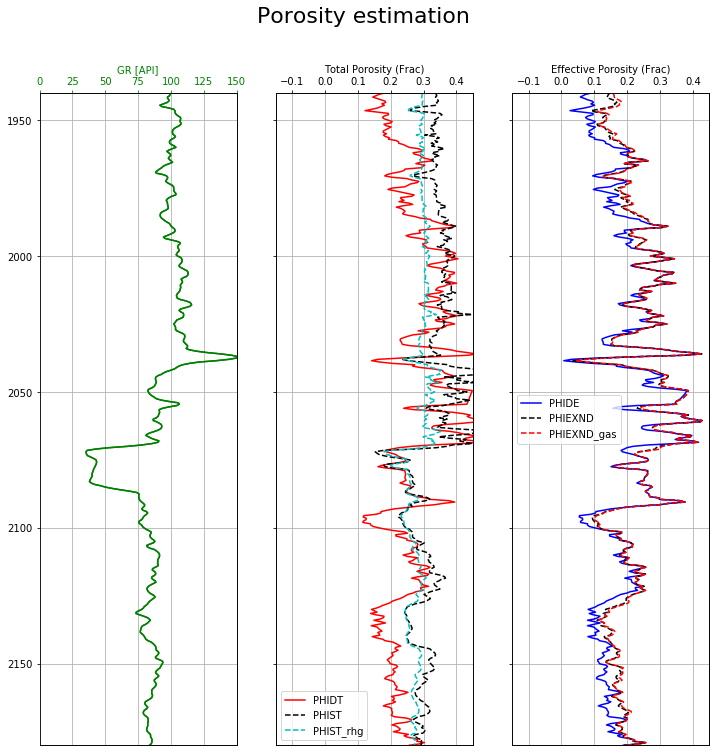

In [ ]:
# Quick plot of estimated porosity total and effective
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharey=True)
fig.suptitle("Porosity estimation", fontsize=22)

for axes in ax:
    axes.set_ylim (top_depth,bottom_depth)
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False)

# Total porosity log
ax11 = ax[0].twiny()
ax11.plot(logs.GR, logs.DEPTH, '-g')
ax11.set_ylabel('Depth [ft]')
ax11.set_xlim(0,150)
ax11.spines['top'].set_position(('outward', 0))
ax11.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
ax11.set_xlabel('GR [API]', color= 'g')
ax11.tick_params(axis='x', colors='g')
ax11.grid(True)

ax1 = ax[1].twiny()
ax1.plot(logs.PHIDT, logs.DEPTH, 'r', label= 'PHIDT')
ax1.plot(logs.PHIST, logs.DEPTH, '--k', label= 'PHIST')
ax1.plot(logs.PHIST_rhg, logs.DEPTH, '--c', label= 'PHIST_rhg')
ax1.set_ylabel('Depth [ft]')
ax1.set_xlim(-.15,.45)
ax1.spines['top'].set_position(('outward', 0))
ax1.set_xlabel('Total Porosity (Frac)', color= 'k')
ax1.tick_params(axis='x', colors='k')
ax1.legend(loc='best')
ax1.grid(True)



# Effective porosity
ax4 = ax[2].twiny()
ax4.plot(logs.PHIDE, logs.DEPTH, 'b', label= 'PHIDE')
#ax4.plot(logs.NPHI/100, logs.DEPTH, 'r', label= 'NeuT')
#ax4.plot(logs.PHINE/100, logs.DEPTH, '--c', label= 'PHINE')
ax4.plot(logs.PHIEXND, logs.DEPTH, '--k', label= 'PHIEXND')
ax4.plot(logs.PHIEXND_gas_cor, logs.DEPTH, '--r', label= 'PHIEXND_gas')
ax4.set_ylabel('Depth [ft]')
ax4.set_xlim(-.15,.45)
ax4.spines['top'].set_position(('outward', 0))
ax4.set_xlabel('Effective Porosity (Frac)', color= 'k')
ax4.tick_params(axis='x', colors='k')
ax4.legend(loc='best')
ax4.grid(True)

In [ ]:
# Store ND Clay corrected porosity as effective porosity
logs['PHIE'] = logs['PHIEXND']

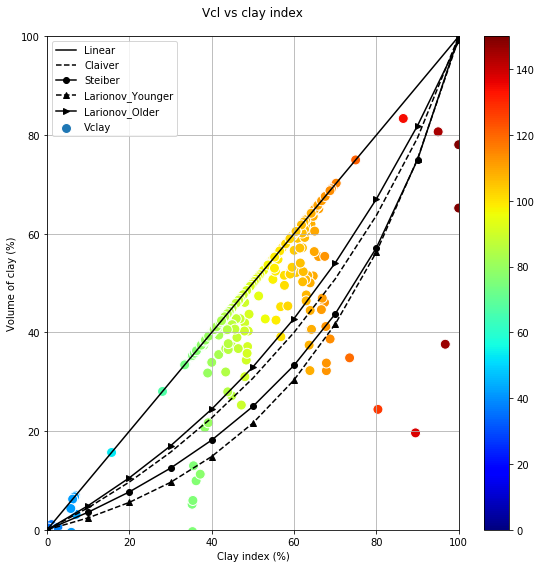

In [ ]:
# Vclay vs Clay index plot
import math
def Icl(GRlog, GRclean, GRclay):
    Icl = (GRlog - GRclean)/(GRclay-GRclean)
    return Icl
logs['CLI'] =Icl(logs.GR, GRclean, GRclay).clip(0,1)
GRI = np.arange(0,1.10,.1) # clay index from 0 to 1 with step of .1

def vclGR(i):
    return i
def vclGR_claiver(i):
    return 1.7 - ((3.38 - (i + 0.7)**2))**.5
def vclGR_steiber(i):
    return i /(3 - 2*i)
def vclGR_larionov_younger(i):
    return 0.083 * (2**(3.7* i) -1)
def vclGR_larionov_older(i):
    return 0.33 *(2**(2*i) -1)

#vclGR = Icl # linear
#vclGR_claiver = 1.7 - ((3.38 - (Icl + 0.7)**2))**.5
#vclGR_steiber = Icl /(3 - 2*Icl)
#vclGR_larionov_younger = 0.083 * (2**(3.7* Icl) -1)
#vclGR_larionov_older = 0.33 *(2**(2*Icl) -1)

# Icl vs vclGR plot
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GRI*100, vclGR(GRI) *100, 'k', label= 'Linear')
ax.plot(GRI*100, vclGR_claiver(GRI)*100,  '--k', label = 'Claiver')
ax.plot(GRI*100, vclGR_steiber(GRI)*100, '-ok', label='Steiber')
ax.plot(GRI*100, vclGR_larionov_younger(GRI)*100, '--^k', label='Larionov_Younger')
ax.plot(GRI*100, vclGR_larionov_older(GRI)*100, '->k', label='Larionov_Older')
t=ax.scatter(logs.CLI*100, logs.Vclay*100, c= logs.GR, marker='o', s=100, edgecolors='w', cmap='jet', vmin=0, vmax=150)
ax.grid(True)
ax.set_xlabel('Clay index (%)', color= 'k')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_ylabel('Volume of clay (%)', color = 'k')
ax.tick_params(axis='x', colors= 'k')
#ax.xaxis.set_label_position('top')
#ax.xaxis.set_ticks_position('top')
ax.set_title('Vcl vs clay index', pad =20)
ax.legend()
plt.colorbar(t)
plt.tight_layout()
plt.savefig('Clay_index_to_Clay_volume_WA1.png', dpi =250, format = 'png')


In [ ]:
# read the core measurement value to compare with log interpretated result
da = pd.read_table('Book2.txt', delim_whitespace=True)

In [ ]:
da.head(5)

,Depth,Permeability,Porosity,Density,Swhc,Sw
0,2062,0.84,9.7,2.64,6.4,51.4
1,2063,6.46,12.7,2.67,0.0,22.0
2,2064,83.00,17.2,2.66,0.0,50.8
3,2065,123.00,22.0,2.66,0.5,51.9
4,2066,68.00,21.3,2.66,1.1,52.4


In [ ]:
da.describe()

,Depth,Permeability,Porosity,Density,Swhc,Sw
count,66.000000,66.000000,66.000000,65.000000,20.000000,20.000000
mean,2769.863636,17.151212,15.829091,2.673538,2.455000,54.900000
std,464.161440,32.532896,4.261575,0.098939,1.926676,14.134244
min,2062.000000,0.050000,2.300000,2.090000,0.000000,22.000000
25%,2078.250000,0.280000,13.125000,2.660000,0.900000,49.500000
50%,3063.500000,1.300000,16.200000,2.670000,2.750000,52.050000
75%,3079.750000,13.000000,19.050000,2.680000,3.725000,57.425000
max,3096.000000,157.000000,25.100000,3.170000,6.400000,89.900000


In [ ]:
da.columns

Index(['Depth', 'Permeability', 'Porosity', 'Density', 'Swhc', 'Sw'], dtype='object')

In [ ]:
# adjust column names and indexing
da = da.rename(columns=({'Depth': 'DEPTH'}))

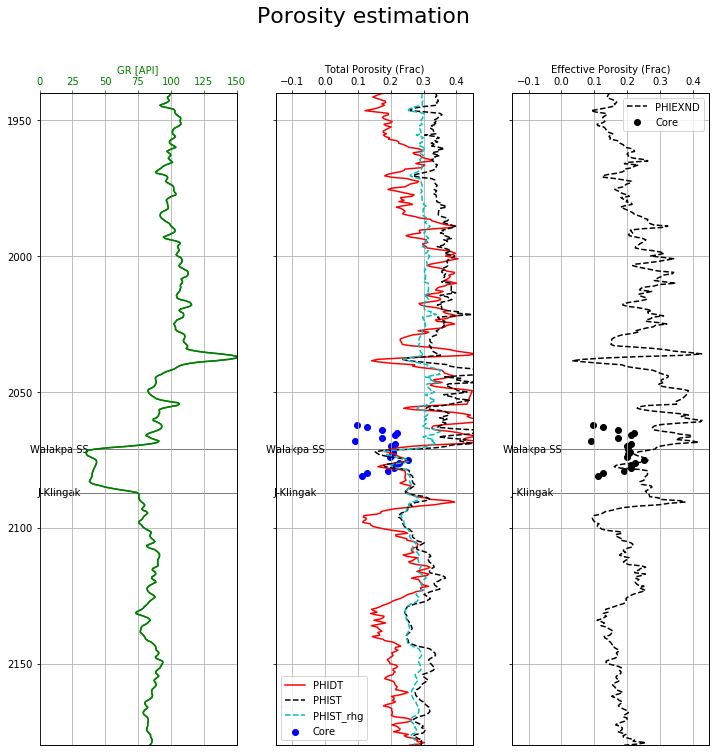

In [ ]:
# Quick plot of estimated porosity total and effective and overlay core measurement
tops = ('Torok','Pebble SH','Walakpa SS', 'J-Klingak','Barrow SS','Klingak SH','T-Sag River SS', 'Shublik','Basement')
tops_depths=(100,1701,2071,2087,2990, 3102,3224,3258,3633)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharey=True)
fig.suptitle("Porosity estimation", fontsize=22)

for axes in ax:
    axes.set_ylim (top_depth,bottom_depth)
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False)
    for (i,j) in zip(tops_depths,tops):
        if ((i>=top_depth) and (i<=bottom_depth)):
            axes.axhline(y=i, linewidth=0.5, color='black')
            axes.text(0.1, i ,j, horizontalalignment='center',
            verticalalignment='center')

# Total porosity log
ax11 = ax[0].twiny()
ax11.plot(logs.GR, logs.DEPTH, '-g')
ax11.set_ylabel('Depth [ft]')
ax11.set_xlim(0,150)
ax11.spines['top'].set_position(('outward', 0))
ax11.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
ax11.set_xlabel('GR [API]', color= 'g')
ax11.tick_params(axis='x', colors='g')
ax11.grid(True)

ax1 = ax[1].twiny()
ax1.plot(logs.PHIDT, logs.DEPTH, 'r', label= 'PHIDT')
ax1.plot(logs.PHIST, logs.DEPTH, '--k', label= 'PHIST')
ax1.plot(logs.PHIST_rhg, logs.DEPTH, '--c', label= 'PHIST_rhg')
ax1.scatter(da.Porosity/100, da.DEPTH, marker='o', color ='b', label = 'Core')
ax1.set_ylabel('Depth [ft]')
ax1.set_xlim(-.15,.45)
ax1.spines['top'].set_position(('outward', 0))
ax1.set_xlabel('Total Porosity (Frac)', color= 'k')
ax1.tick_params(axis='x', colors='k')
ax1.legend(loc='best')
ax1.grid(True)



# Effective porosity
ax4 = ax[2].twiny()
#ax4.plot(logs.PHIDE, logs.DEPTH, 'b', label= 'PHIDE')
#ax4.plot(logs.NPHI/100, logs.DEPTH, 'r', label= 'NeuT')
#ax4.plot(logs.PHINE/100, logs.DEPTH, '--c', label= 'PHINE')
ax4.plot(logs.PHIEXND, logs.DEPTH, '--k', label= 'PHIEXND')
ax4.scatter(da.Porosity/100, da.DEPTH, marker='o', color ='k', label = 'Core')
ax4.set_ylabel('Depth [ft]')
ax4.set_xlim(-.15,.45)
ax4.spines['top'].set_position(('outward', 0))
ax4.set_xlabel('Effective Porosity (Frac)', color= 'k')
ax4.tick_params(axis='x', colors='k')
ax4.legend(loc='best')
ax4.grid(True)
plt.savefig('WA1_porosity_estimation_core_overlay.png', dpi =250)

In [ ]:
# choose every meter of log data
logs1 = logs.iloc[::2,:]
logs1.head(5)

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT,...,PHIDE,PHIST,PHISE_W,PHIST_rhg,PHISE_rhg,PHINE,PHIEXND,PHIEXND_gas_cor,PHIE,CLI
3678,1940.0,-3.23189,99.0899,8.8150,NaN,8.4731,9.5062,2.3682,45.8292,105.1210,...,0.091919,0.337474,0.110208,0.294429,0.067162,20.722543,0.149572,0.160299,0.149572,0.557303
3680,1941.0,-2.95584,99.0174,8.8070,NaN,8.1391,9.0861,2.4096,46.8530,105.5186,...,0.065311,0.340184,0.113175,0.295674,0.068665,21.774713,0.141529,0.160747,0.141529,0.556673
3682,1942.0,-3.55608,97.5429,8.8172,NaN,7.8183,8.7349,2.4060,46.5442,105.1233,...,0.069701,0.337490,0.115710,0.294436,0.072655,22.042891,0.145065,0.163474,0.145065,0.543851
3684,1943.0,-4.80052,98.4725,8.8121,NaN,7.5102,8.4133,2.3668,48.6475,106.2277,...,0.093688,0.345016,0.119940,0.297873,0.072796,23.782435,0.165756,0.180745,0.165756,0.551935
3686,1944.0,-5.71556,94.2579,8.7968,NaN,7.4797,8.3611,2.3822,46.5320,105.7510,...,0.089664,0.341768,0.131636,0.296398,0.086266,23.316126,0.161412,0.176640,0.161412,0.515286


In [ ]:
logs2=logs1[(logs1.DEPTH >= 2071) & (logs1.DEPTH <= 2081)]

In [ ]:
logs2.head(5)

,DEPTH,SP,GR,CALI,LL8,ILM,ILD,RHOB,NPHI,DT,...,PHIDE,PHIST,PHISE_W,PHIST_rhg,PHISE_rhg,PHINE,PHIEXND,PHIEXND_gas_cor,PHIE,CLI
3940,2071.0,-20.35406,42.9354,8.4480,NaN,5.8543,8.1024,2.3362,41.2766,95.7441,...,0.191322,0.273573,0.245434,0.262053,0.233914,38.143443,0.286378,0.301742,0.286378,0.069003
3942,2072.0,-31.60192,35.4001,8.4181,NaN,11.5646,15.4859,2.3614,28.7462,78.0086,...,0.185632,0.152710,0.151291,0.179536,0.178118,28.561639,0.235624,0.240869,0.235624,0.003479
3944,2073.0,-35.89998,35.8481,8.3882,NaN,21.9574,27.7313,2.3169,21.5321,79.6928,...,0.218935,0.164187,0.174382,0.188951,0.199145,22.629075,0.222613,0.222643,0.222613,0.007375
3946,2074.0,-35.96644,39.1977,8.3747,NaN,33.0693,46.4328,2.2941,19.9072,85.3403,...,0.246675,0.202673,0.245812,0.217807,0.260945,24.639486,0.246535,0.246535,0.246535,0.036502
3948,2075.0,-35.37870,43.0418,8.4011,NaN,35.7054,45.2723,2.2687,21.3647,93.4919,...,0.264074,0.258225,0.303923,0.253310,0.299008,26.379430,0.263934,0.263934,0.263934,0.069929


In [ ]:
# choose similar depth range of core measurement
da = da.iloc[1:,]
da1 = da[(da.DEPTH >= 2071) & (da.DEPTH <= 2081)]

In [ ]:
da1.head(5)

,DEPTH,Permeability,Porosity,Density,Swhc,Sw
9,2071,38.0,20.3,2.66,5.1,59.9
10,2072,55.0,20.8,2.67,3.5,51.7
11,2073,43.0,20.3,2.66,1.1,55.0
12,2074,25.0,19.9,2.78,2.9,44.5
13,2075,157.0,25.1,2.68,3.5,52.3


In [ ]:
# best fit function definition
def best_fit(x, y):
    xbar = float(sum(x)/len(x))
    ybar = float(sum(y)/len(y))

    numer = float(sum([(xi - xbar)*(yi - ybar) for xi, yi in zip(x,y)]))
    deno = float(sum([(xi -xbar)**2 for xi in x]))

    b1 = float(numer/deno)

    b0 = float(ybar - b1 * xbar)
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(b0, b1))

    return b0, b1

best fit line:
y = 0.26 + -0.29x


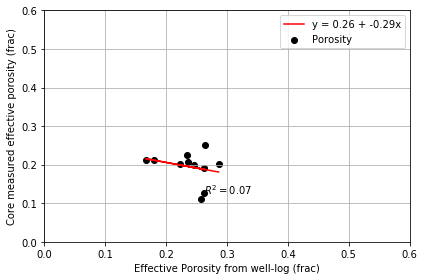

In [ ]:
b0 , b1 = best_fit(logs2.PHIEXND, da1.Porosity/100)
#plt.figure(figsize=(6,4))
plt.scatter(logs2.PHIEXND, da1.Porosity/100, color='k')
yfit = [b0 + b1 *xi for xi in logs2.PHIEXND]
ybar = float(sum(da1.Porosity/100)/len(da1.Porosity/100))
SST = float(sum([(yi - ybar)**2 for yi in da1.Porosity/100]))
SSR = float(sum([(yfiti - ybar)**2 for yfiti in yfit ]))
Rsqr = float(SSR/SST)

plt.plot(logs2.PHIEXND, yfit, 'r', label = 'y = {:.2f} + {:.2f}x'.format(b0, b1))
plt.legend()
plt.xlabel('Effective Porosity from well-log (frac)')
plt.ylabel('Core measured effective porosity (frac)')
plt.text(.8*max(logs2.PHIEXND)+.2*min(logs2.PHIEXND),.4*max(da1.Porosity/100)+.2*min(da1.Porosity/100),'$R^2 = %0.2f$'% Rsqr,
         fontsize=10)
plt.xlim(0, .6)
plt.ylim(0, .6)
plt.grid(True)
plt.tight_layout()

# Resitivity of water (Rw) determination

Various methods are available for determining the resitivity of the formation water Rw.
Ther are as follows:

Direct measurement of a water sample
Computation from chemical analysis of a water sample
Use of the SP (Require mud information)
The Rwa technique (Based on Archie's relationship)
The ratio technique
Various types of crossplots (Logarithamic plot known as Pickett plot)
Use of F overlays

We will start with Archie's equation

Sw^n = (a/PHIE^m)*(Rw/Rt)
on log scale

nlogSw = log(a) + log(Rw) - m* log (PHIE) - log(Rt)

log(Rt) = -m * log(PHIE) + log(aRw) - n*log(Sw)

Plot of Rt vs PHIE in a logarithmaic scale gives a liner-plot with slope of -m. We could obtain value of aRw if the plot passes through PHIE = 1, it is 100% Sw line.

In 100% bearing formation, log(Sw) = 0

We will start with
m = 2
a = 1
n = 2 (Saturation exponent)

NameError: name 'logs' is not defined

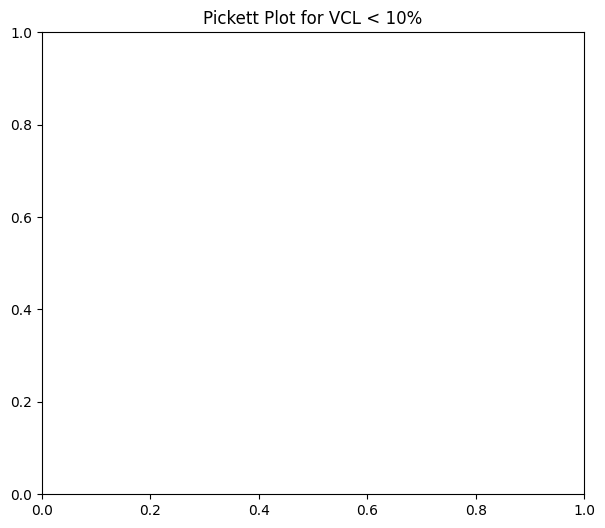

In [27]:
Rwa = 0.32 # water restivity from drill stem test
vcl_limit=0.1 #volume of clay upper limit for selction of data for graph
a = 1
m = 2
n = 2

import matplotlib.ticker as ticker

pickett_figure=plt.figure(figsize=(7,6))
plt.title('Pickett Plot'+ ' for VCL < '+str(int(vcl_limit*100))+'%')
plt.loglog(logs.ILD[logs.Vclay< vcl_limit],logs.PHIEXND[logs.Vclay< vcl_limit],'ro', label='',color='red')
plt.ylim(0.01,1)
plt.xlim(0.1,1000)
plt.ylabel('PHIE [frac]')
plt.xlabel('Rt [ohm-m]')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

# Saturation line draw
sw=(1.0,0.8,0.6,0.4,0.2)
phie=(0.01,1)
rt=np.zeros((len(sw),len(phie)))

for i in range (0,len(sw)):
    for j in range (0,len(phie)):
        rt_out=((a*Rwa)/(sw[i]**n)/(phie[j]**m))
        rt[i,j]=rt_out
for i in range(0,len(sw)):
    plt.plot(rt[i],phie, label='SW '+str(int(sw[i]*100))+'%')
    plt.legend (loc='best')

plt.grid(True, which='both',ls='-',color='gray')

# Water saturation (Sw)

Define value of Rw from Picket plot, then use Archie'e equation to estimate saturation

In [ ]:
def sw_archie(Rw, Rt, PHIE, a, m, n):
    F = a /(PHIE**m)
    Swa = (F * Rw/Rt)**(1/n)
    return Swa

In [ ]:
Rw = Rwa
logs['Swa'] = sw_archie(Rw, logs.ILD, logs.PHIEXND, a, m, n).clip(0,1)

Bulk Volume of Water [BVW] computed as Sw*PHIE

In [ ]:
logs['BVW'] = logs['Swa'] * logs['PHIEXND']
logs['matrix'] = 1 - logs.Vclay - logs.PHIEXND

# Interpretative plot of caly volume, porosity, saturation

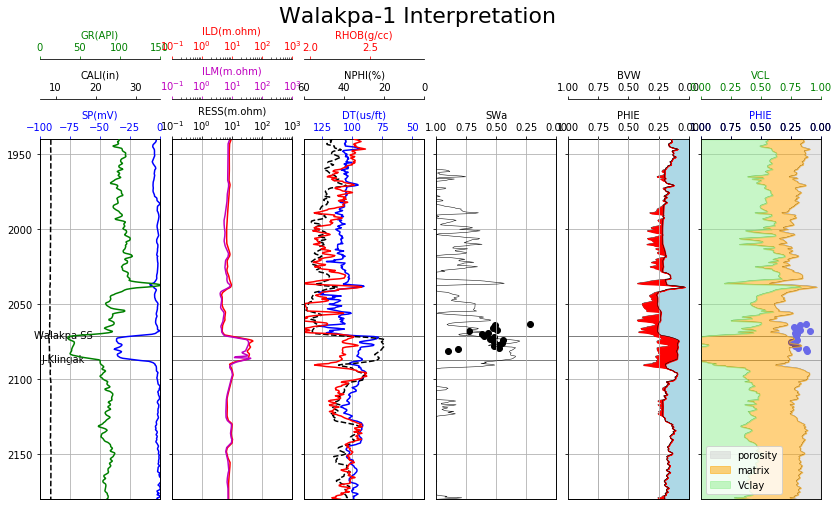

In [ ]:
# plot of interpreted logs
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(14,8), sharey=True)
fig.suptitle("Walakpa-1 Interpretation", fontsize=22)
fig.subplots_adjust(top=0.75,wspace=0.1)

# setting for all axes
for axes in ax:
    axes.set_ylim (top_depth,bottom_depth)
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False)
    for (i) in tops_depths:
        if ((i>=top_depth) and (i<=bottom_depth)):
            axes.axhline(y=i, linewidth=0.5, color='black')

for (i,j) in zip(tops_depths,tops):
    if ((i>=top_depth) and (i<=bottom_depth)):
        ax[0].text(0.2, i ,j, horizontalalignment='center',verticalalignment='center')


#First track GR, CALI, SP logs to display
ax1 = ax[0].twiny()
ax1.set_xlim(-100,0)
ax1.spines['top'].set_position(('outward',0))
ax1.plot(logs.SP, logs.DEPTH, '-b', label= "SP (mV)")
ax1.set_xlabel('SP(mV)',color='b')
ax1.tick_params(axis='x', colors='b')
ax1.grid(True)

ax2 = ax[0].twiny()
ax2.set_xlim(6, 36)
ax2.spines['top'].set_position(('outward', 40))
ax2.plot(logs.CALI, logs.DEPTH, '--k', label= "CALI (in)")
ax2.set_xlabel('CALI(in)', color ='k')
ax2.tick_params(axis='x', colors='k')

ax3 = ax[0].twiny()
ax3.set_xlim(0,150)
ax3.spines['top'].set_position(('outward', 80))
ax3.plot(logs.GR, logs.DEPTH, '-g', label= "GR (API)")
ax3.set_xlabel('GR(API)', color= 'g')
ax3.tick_params(axis='x', colors='g')


# Second track resitivity plot
ax11 = ax[1].twiny()
ax11.set_xlim(0.1, 1000)
ax11.set_xscale('log')
ax11.grid(True)
ax11.spines['top'].set_position(('outward', 80))
ax11.plot(logs.ILD, logs.DEPTH, '-r', label="ILD (m.ohm)")
ax11.set_xlabel('ILD(m.ohm)', color = 'r')
ax11.tick_params(axis='x', colors='r')


ax12 = ax[1].twiny()
ax12.set_xlim(0.1, 1000)
ax12.set_xscale('log')
ax12.spines['top'].set_position(('outward', 40))
ax12.plot(logs.ILM, logs.DEPTH, '-m', label= "ILM (m.ohm)")
ax12.set_xlabel('ILM(m.ohm)', color= 'm')
ax12.tick_params(axis='x', colors='m')

ax13 = ax[1].twiny()
ax13.set_xlim(0.1, 1000)
ax13.set_xscale('log')
ax13.spines['top'].set_position(('outward', 0))
ax13.plot(logs.LL8, logs.DEPTH, '-k', label="LL8 (m.ohm)")
ax13.set_xlabel('RESS(m.ohm)', color = 'k')
ax13.tick_params(axis='x', colors='k')

# Third track NPHI, RHO, DT display
ax21 = ax[2].twiny()
ax21.grid(True)
ax21.set_xlim(140,40)
ax21.spines['top'].set_position(('outward', 0))
ax21.plot(logs.DT, logs.DEPTH, '-b', label= "DT (us/ft)")
ax21.set_xlabel('DT(us/ft)', color= 'b')
ax21.tick_params(axis='x', colors= 'b')

#NPHI
ax22 = ax[2].twiny()
ax22.set_xlim(0, 60)
ax22.invert_xaxis()
ax22.spines['top'].set_position(('outward', 40))
ax22.plot(logs.NPHI, logs.DEPTH, '--k', label = "NPHI (%)")
ax22.set_xlabel('NPHI(%)', color = 'k')
ax22.tick_params(axis= 'x', colors='k')


#RHOB
ax23 = ax[2].twiny()
ax23.set_xlim(1.95, 2.95)
ax23.spines['top'].set_position(('outward', 80))
ax23.plot(logs.RHOB, logs.DEPTH, '-r', label= "RHOB (g/cc)")
ax23.set_xlabel('RHOB(g/cc)', color = 'r')
ax23.tick_params(axis='x', colors= 'r')

# Fourth track :Sw

ax31=ax[3].twiny()
ax31.grid(True)
ax31.set_xlim(1,0)
ax31.plot(logs.Swa, logs.DEPTH, label='SWa', color='black',linewidth=0.5)
ax31.scatter(da.Sw/100, da.DEPTH, marker='o', color ='k', label = 'Core')
ax31.spines['top'].set_position(('outward',0))
ax31.set_xlabel('SWa', color='black')
ax31.tick_params(axis='x', colors='black')


# Fifth track PHIE, BVW

ax41 = ax[4].twiny()
ax41.grid(True)
ax41.set_xlim(1,0)
ax41.plot(logs.PHIEXND, logs.DEPTH, label='PHIE', color='black', linewidth=0.5)
ax41.fill_betweenx(logs.DEPTH,0,logs.BVW,color='lightblue')
ax41.spines['top'].set_position(('outward',0))
ax41.set_xlabel('PHIE', color='black')
ax41.tick_params(axis='x', colors='black')

ax42 = ax[4].twiny()
ax42.grid(True)
ax42.set_xlim(1,0)
ax42.plot(logs.BVW, logs.DEPTH, label='BVW', color='black', linewidth=0.5)
ax42.fill_betweenx(logs.DEPTH,logs.PHIEXND,logs.BVW,color='red')
ax42.spines['top'].set_position(('outward',40))
ax42.set_xlabel('BVW', color='black')
ax42.tick_params(axis='x', colors='black')


# Sixth track: PHIE, VCL, Matrix

ax51 = ax[5].twiny()
ax51.set_xlim(1,0)
ax51.spines['top'].set_position(('outward',0))
ax51.plot(logs.PHIEXND, logs.DEPTH, label='PHIE', color='black',linewidth=0.5)
ax51.scatter(da.Porosity/100, da.DEPTH, marker='o', color ='b', label = 'Core')
ax51.set_xlabel('PHIE', color='blue')
ax51.tick_params(axis='x', colors='blue')

ax52=ax[5].twiny()
ax52.set_xlim(0,1)
ax52.spines['top'].set_position(('outward',40))
ax52.plot(logs.Vclay, logs.DEPTH, label='VCL', color='green',linewidth=0.5)
ax52.set_xlabel('VCL', color='green')
ax52.tick_params(axis='x', colors='green')

ax53=ax[5].twiny()
ax53.set_xlim(1,0)
ax53.spines['top'].set_position(('outward',0))
ax53.fill_betweenx(logs.DEPTH,0,logs.PHIEXND,color='lightgray',alpha=.5,label='porosity')
ax53.fill_betweenx(logs.DEPTH,logs.PHIEXND,1-logs.Vclay,color='orange',alpha=.5,label='matrix')
ax53.fill_betweenx(logs.DEPTH,1-logs.Vclay,1,color='lightgreen',alpha=.5,label= 'Vclay')
ax53.legend(loc='lower left')
#plt.tight_layout()
plt.savefig ('Walakpa_interpretation_1940-2180m.png', dpi=200, format='png')


# Net pay summary over the zone of interest

In [ ]:
logs.columns

Index(['DEPTH', 'SP', 'GR', 'CALI', 'LL8', 'ILM', 'ILD', 'RHOB', 'NPHI', 'DT',
       'VCLGR', 'VCLSP', 'VCLND', 'Vclay', 'PHIDT', 'PHIDE', 'PHIST',
       'PHISE_W', 'PHIST_rhg', 'PHISE_rhg', 'PHINE', 'PHIEXND',
       'PHIEXND_gas_cor', 'PHIE', 'CLI', 'Swa', 'BVW', 'matrix'],
      dtype='object')

ZONE:  2050 m - 2100 m
Mean values:


PHIEXND    0.270411
Swa        0.658006
BVW        0.171078
Vclay      0.233523
dtype: float64

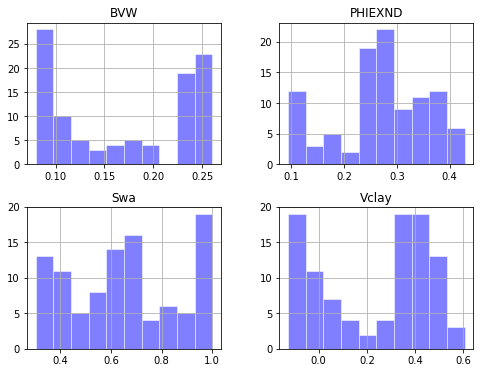

In [ ]:
top_summary = 2050
depth_summary = 2100
logs3 = logs[(logs.DEPTH >= top_summary) & (logs.DEPTH <= depth_summary)]

logs3[['PHIEXND','Swa','BVW','Vclay']].hist(figsize=(8, 6),color = 'b', edgecolor='w', alpha=0.5)
print ('ZONE: ', top_summary, 'm -', depth_summary, 'm')
print ('Mean values:')
logs3[['PHIEXND','Swa','BVW','Vclay']].mean()
#plt.savefig('Net_pay_summary.png', dpi=250)

# Export calculated logs as a csv file

In [ ]:
logs.to_csv('Interpretated_WA1_Well_Logs.csv', encoding='utf-8')